In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
# %cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

In [6]:
%cd C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5

C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5


In [7]:
#!pip install -qr requirements.txt
import torch
from IPython.display import Image, clear_output
from utils.downloads import attempt_download
print('Setup complete. Using torch %s %s' % (torch.__version__,
      torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cpu CPU


In [8]:
!pip install -q roboflow
from roboflow import Roboflow

In [5]:
%cd C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5

C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\yolov5


In [10]:
# type "C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\data.yaml"
with open('C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\data.yaml', 'r') as file:
    contents = file.read()
    print(contents)

train: C:\Users\krrah\Downloads\Dewinter2023\yolov5_new\differential_wbc_data\train\images
val: C:\Users\krrah\Downloads\Dewinter2023\yolov5_new\differential_wbc_data\valid\images
test: C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\test\images
nc: 5
names: ['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']


In [12]:
import yaml
with open("C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data" + "\\data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
print(num_classes)

5


In [13]:
from IPython.core.magic import register_line_cell_magic


@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [15]:
%%writetemplate C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5\models\yolov5x.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%%time
%cd C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\yolov5
!python train.py --img 416 --batch 16 --epochs 150 --data C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\data.yaml --cfg yolov5\models\custom_yolov5x.yaml --weights '' --name yolov5x_results  --cache

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
from utils.plots import plot_results
Image(filename='/content/yolov5/runs/train/yolov5s_results3/results.png', width=1000)

In [5]:
%cd C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5
!python detect.py --weights C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\weights_100epochs\best.pt --img 416 --conf 0.4 --source C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\cropped_images8

C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\yolov5
Results saved to: predictions.csv


detect: weights=['C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\weights_100epochs\\best.pt'], source=C:\Users\User\Downloads\Dewinter2023\Final_yolov5x\cropped_images8, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-306-gfbe67e4 Python-3.11.0 torch-2.0.1+cpu CPU

Fusing layers... 
custom_YOLOv5x summary: 444 layers, 86200330 parameters, 0 gradients
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arg

In [27]:
!python val.py --weights C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\weights_100epochs\best.pt --data C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\data.yaml --img 416 --iou 0.65 --half --task test

val: data=C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\data.yaml, weights=['C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\weights_100epochs\\best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5  v6.1-306-gfbe67e4 Python-3.7.0 torch-1.10.0+cpu CPU

Fusing layers... 
custom_YOLOv5x summary: 444 layers, 86200330 parameters, 0 gradients, 203.8 GFLOPs

test: Scanning 'C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\test\labels' images and labels...:   0%|          | 0/166 [00:00<?, ?it/s]
test: Scanning 'C:\Users\krrah\Downloads\Dewinter2023\Final_yolov5x\differential_wbc_data\test\labels' images and labels...1 found, 0 missing, 0 empty, 0 corrupt:   1%|          | 1/166 [00:02<08:04,  2.94s

In [19]:
import cv2
img = cv2.imread("C:\\Users\\User\\Downloads\\Dewinter2023\\Final_yolov5x\\image_sample\\2022-10-19-13-43-42.jpg")
img.shape

(1080, 1440, 3)

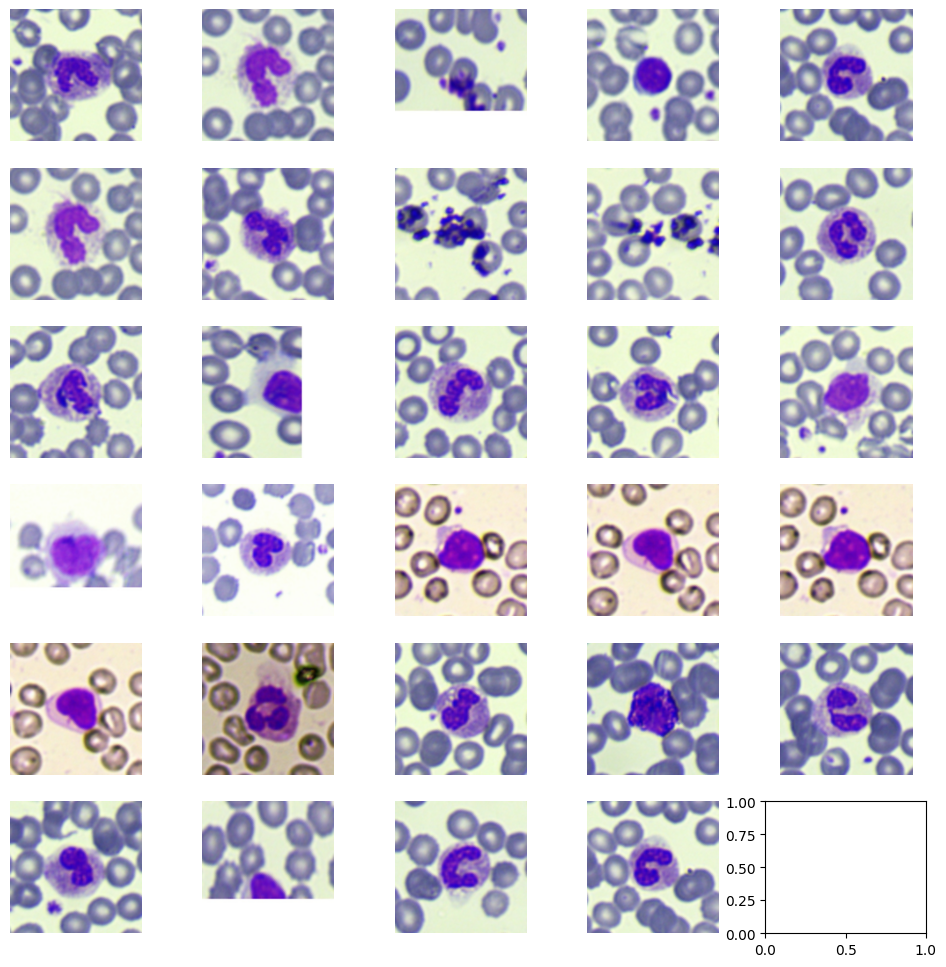

In [6]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 12))

for i, imageName in enumerate(glob.glob('C:/Users/User/Downloads/Dewinter2023/Final_yolov5x/yolov5/runs/detect/exp45/*.jpg')):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    img = Image.open(imageName)
    img_array = np.array(img)
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

Processing of the input images

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

image_folder_path = 'C:/Users/krrah/Downloads/Dewinter2023/Final_yolov5x/image_sample'
os.listdir(image_folder_path)

images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path))

plt.figure(figsize=(20, 20))
# Perform some operations on each image
processed_img_list = []
final_image = []
wbc_count_per_image = []
bb_coordinates = []
for i, img in enumerate(images):

    # Pad the image
    pad = 30
    padded_img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)),
                        mode='constant', constant_values=255)
    # converting BGR into LAB colorspace
    lab = cv2.cvtColor(padded_img, cv2.COLOR_BGR2LAB)

    cv2.imwrite("lab_img.jpg", lab)
    lab = cv2.imread("lab_img.jpg")
    # converting BGR to RGB
    lab = cv2.cvtColor(lab, cv2.COLOR_BGR2RGB)
    # plt.imshow(lab)
    # Convert the image from RGB to HSV
    img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the green color in the HSV color space
    lower_green = np.array([40, 130, 170])
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image based on the color range
    img_mask = cv2.inRange(img_hsv, lower_green, upper_green)

    # Display the selected image
    # plt.imshow(img_mask,cmap='gray')
    # Finding contours in the image mask
    contours, hierarchy = cv2.findContours(
        img_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_res = padded_img.copy()
    wbc_count = 0
    for cnt in contours:

        x, y, w, h = cv2.boundingRect(cnt)
        if w > 20 and h > 20:
            wbc_count += 1
            # Filter out small contours
            # cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)
            # Compute the center of the bounding box
            center_x = x + w // 2
            center_y = y + h // 2
            # Define the size of the cropped image
            crop_size = 150
            # Compute the coordinates of the top-left corner of the cropped image
            crop_x = center_x - crop_size // 2
            crop_y = center_y - crop_size // 2
            # Crop the small image from the original image
            cropped_img = padded_img[crop_y:crop_y +
                                     crop_size, crop_x:crop_x+crop_size]

            cv2.rectangle(img_res, (crop_x, crop_y),
                          (crop_x+crop_size, crop_y+crop_size), (0, 0, 255), 2)
            final_image.append(cropped_img)
            cv2.putText(img_res, 'WBC', (crop_x, crop_y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)
            # final_image.append(cropped_img)
            # Draw a green rectangle
            # cv2.putText(img_copy, 'WBC', (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            '''plt.subplot(2,len(images),i+1);plt.imshow(img_copy)'''
    wbc_count_per_image.append([file_path[i], wbc_count])
    # Add the processed image to the processed image list
    processed_img_list.append(img_res)

# save the list to a CSV file
with open("wbc_counts.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Filename", "WBC Count"])
    writer.writerows(wbc_count_per_image)

output_folder = "cropped_images8"
os.makedirs(output_folder, exist_ok=True)

for i in range(len(final_image)):
    if final_image[i] is None or final_image[i].size == 0:
        continue
    resized_image = cv2.resize(final_image[i], (416, 416))
    output_filename = os.path.join(output_folder, f"final_image{i}.jpg")
    cv2.imwrite(output_filename, resized_image)
    plt.subplot(6, 5, i+1)
    plt.imshow(final_image[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
image_folder_path = 'C:/Users/krrah/Downloads/Dewinter2023/Final_yolov5x/image_sample'
os.listdir(image_folder_path)

['2022-10-19-13-43-42.jpg',
 '2022-10-19-13-43-52.jpg',
 '2022-10-19-13-44-33.jpg',
 '2022-10-19-13-45-49.jpg',
 '2022-10-19-13-46-00.jpg',
 '2022-10-19-13-50-45.jpg',
 '2022-10-19-15-03-24.jpg',
 '2022-10-19-15-03-38.jpg',
 '2022-10-19-15-03-51.jpg',
 '2022-10-19-15-04-06.jpg',
 '2022-10-19-15-04-54.jpg',
 '2022-10-19-15-07-58.jpg',
 '2022-12-26-17-03-49.jpg',
 '2022-12-26-17-04-29.jpg',
 '2022-12-26-17-10-27.jpg']

In [4]:
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path))

In [5]:
plt.figure(figsize=(20, 20))
# Perform some operations on each image
processed_img_list = []
final_image = []
wbc_count_per_image = []
bb_coordinates = []
for i, img in enumerate(images):

    # Pad the image
    pad = 30
    padded_img = np.pad(img, ((pad, pad), (pad, pad), (0, 0)),
                        mode='constant', constant_values=255)
    # converting BGR into LAB colorspace
    lab = cv2.cvtColor(padded_img, cv2.COLOR_BGR2LAB)

    cv2.imwrite("lab_img.jpg", lab)
    lab = cv2.imread("lab_img.jpg")
    # converting BGR to RGB
    lab = cv2.cvtColor(lab, cv2.COLOR_BGR2RGB)
    # plt.imshow(lab)
    # Convert the image from RGB to HSV
    img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the green color in the HSV color space
    lower_green = np.array([40, 130, 170])
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image based on the color range
    img_mask = cv2.inRange(img_hsv, lower_green, upper_green)

    # Display the selected image
    # plt.imshow(img_mask,cmap='gray')
    # Finding contours in the image mask
    contours, hierarchy = cv2.findContours(
        img_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_res = padded_img.copy()
    wbc_count = 0
    for cnt in contours:

        x, y, w, h = cv2.boundingRect(cnt)
        if w > 20 and h > 20:
            wbc_count += 1
            # Filter out small contours
            # cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)
            # Compute the center of the bounding box
            center_x = x + w // 2
            center_y = y + h // 2
            # Define the size of the cropped image
            crop_size = 150
            # Compute the coordinates of the top-left corner of the cropped image
            crop_x = center_x - crop_size // 2
            crop_y = center_y - crop_size // 2
            # Crop the small image from the original image
            cropped_img = padded_img[crop_y:crop_y +
                                     crop_size, crop_x:crop_x+crop_size]

            cv2.rectangle(img_res, (crop_x, crop_y),
                          (crop_x+crop_size, crop_y+crop_size), (0, 0, 255), 2)
            final_image.append(cropped_img)
            cv2.putText(img_res, 'WBC', (crop_x, crop_y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)
            # final_image.append(cropped_img)
            # Draw a green rectangle
            # cv2.putText(img_copy, 'WBC', (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            '''plt.subplot(2,len(images),i+1);plt.imshow(img_copy)'''
    wbc_count_per_image.append([file_path[i], wbc_count])
    # Add the processed image to the processed image list
    processed_img_list.append(img_res)

<Figure size 2000x2000 with 0 Axes>

In [6]:
# save the list to a CSV file
with open("wbc_counts.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Filename", "WBC Count"])
    writer.writerows(wbc_count_per_image)

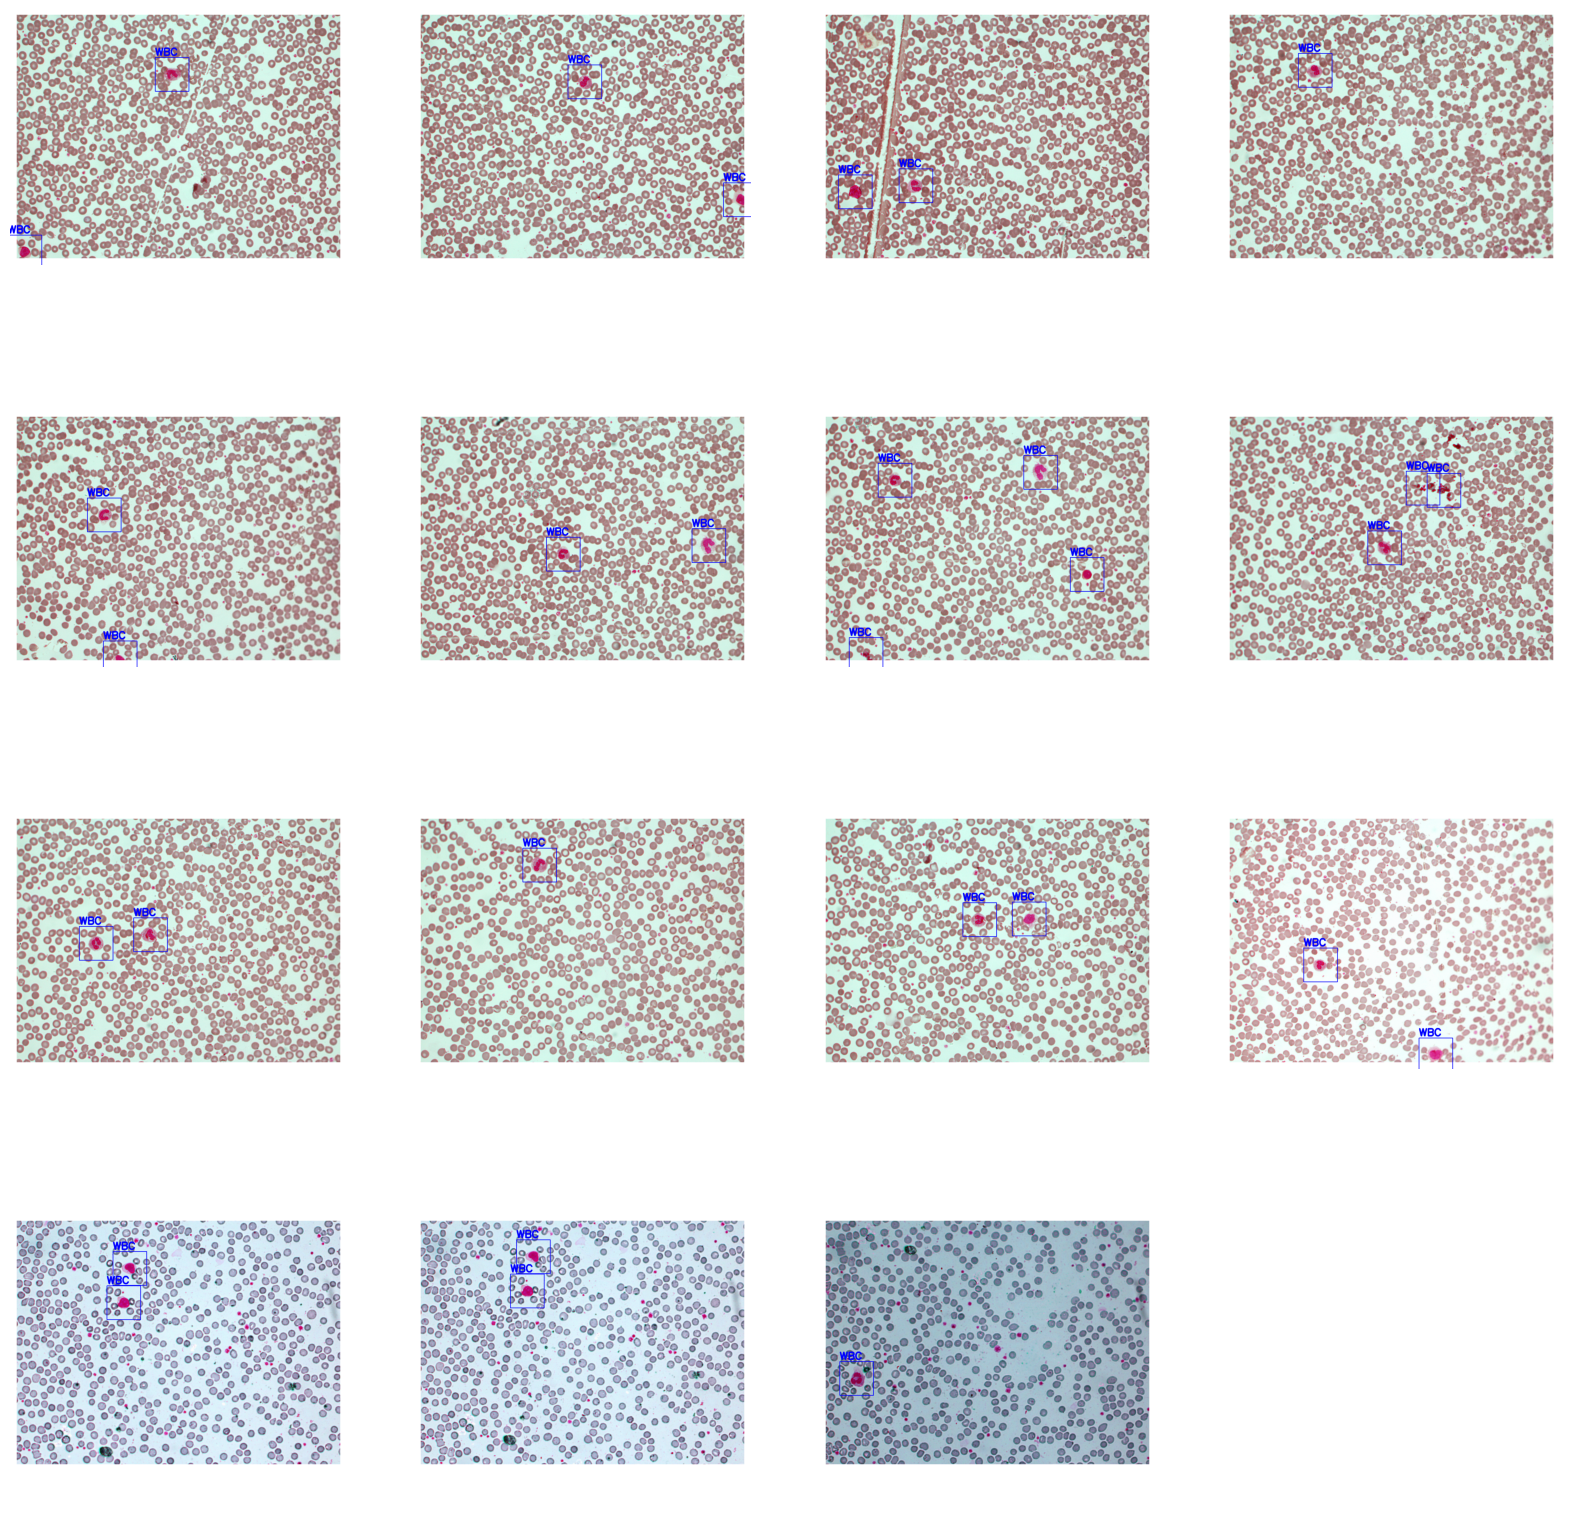

In [7]:
# calculate the number of rows and columns based on the number of images
num_images = len(processed_img_list)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# loop through the images and display them in the subplots
for i, image in enumerate(processed_img_list):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(image)
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

In [42]:
output_folder = "cropped_images8"
os.makedirs(output_folder, exist_ok=True)

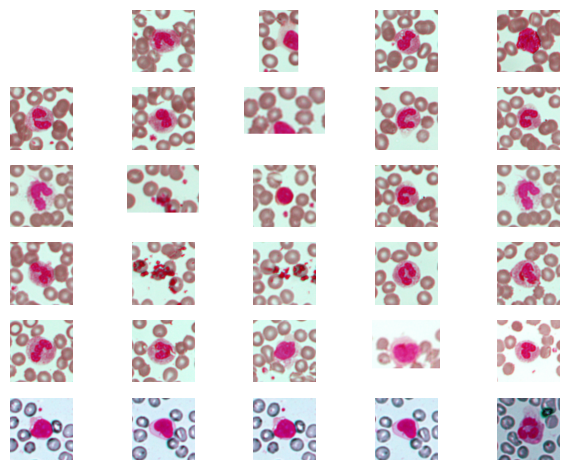

In [43]:
for i in range(len(final_image)):
    if final_image[i] is None or final_image[i].size == 0:
        continue
    resized_image = cv2.resize(final_image[i], (416, 416))
    output_filename = os.path.join(output_folder, f"final_image{i}.jpg")
    cv2.imwrite(output_filename, resized_image)
    plt.subplot(6, 5, i+1)
    plt.imshow(final_image[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

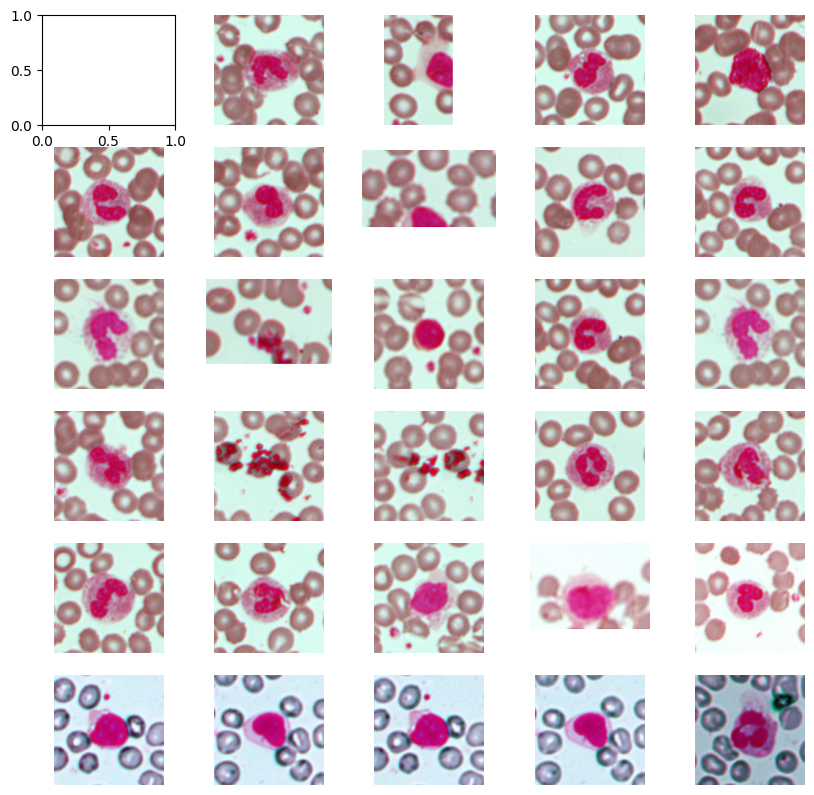

In [49]:
# calculate the number of rows and columns based on the number of images
num_images = len(final_image)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(final_image):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(image)
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

In [59]:
import os

# Define the path to the labels folder and initialize a dictionary to store the counts
label_dir = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\train\\labels'
class_counts = {}
# Loop over each label file in the labels folder
for label_file in os.listdir(label_dir):
    # Open the label file and read the class label from the first word
    with open(os.path.join(label_dir, label_file)) as f:
        # Check if the file is empty or doesn't contain any class label
        line = f.readline().strip()
        if not line:
            continue

        # Extract the class label from the first word of the file
        class_label = line.split()[0]

    # Increment the count for the corresponding class label in the dictionary
    if class_label in class_counts:
        class_counts[class_label] += 1
    else:
        class_counts[class_label] = 1

# Print the class counts
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} images")

0: 168 images
2: 816 images
3: 492 images
1: 639 images
4: 1086 images


In [60]:
import os

# Define the path to the labels folder and initialize a dictionary to store the counts
label_dir = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\valid\\labels'
class_counts = {}
# Loop over each label file in the labels folder
for label_file in os.listdir(label_dir):
    # Open the label file and read the class label from the first word
    with open(os.path.join(label_dir, label_file)) as f:
        # Check if the file is empty or doesn't contain any class label
        line = f.readline().strip()
        if not line:
            continue

        # Extract the class label from the first word of the file
        class_label = line.split()[0]

    # Increment the count for the corresponding class label in the dictionary
    if class_label in class_counts:
        class_counts[class_label] += 1
    else:
        class_counts[class_label] = 1

# Print the class counts
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} images")

0: 15 images
2: 79 images
3: 46 images
1: 62 images
4: 102 images


In [61]:
import os

# Define the path to the labels folder and initialize a dictionary to store the counts
label_dir = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\test\\labels'
class_counts = {}
# Loop over each label file in the labels folder
for label_file in os.listdir(label_dir):
    # Open the label file and read the class label from the first word
    with open(os.path.join(label_dir, label_file)) as f:
        # Check if the file is empty or doesn't contain any class label
        line = f.readline().strip()
        if not line:
            continue

        # Extract the class label from the first word of the file
        class_label = line.split()[0]

    # Increment the count for the corresponding class label in the dictionary
    if class_label in class_counts:
        class_counts[class_label] += 1
    else:
        class_counts[class_label] = 1

# Print the class counts
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} images")

0: 10 images
2: 42 images
1: 34 images
3: 26 images
4: 53 images


In [11]:
img = cv2.imread("C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\train\\images\\95-8-6-1_11_1_jpg.rf.390f0ea364e1eaa701e37fbc2e98e3c2.jpg", 0)

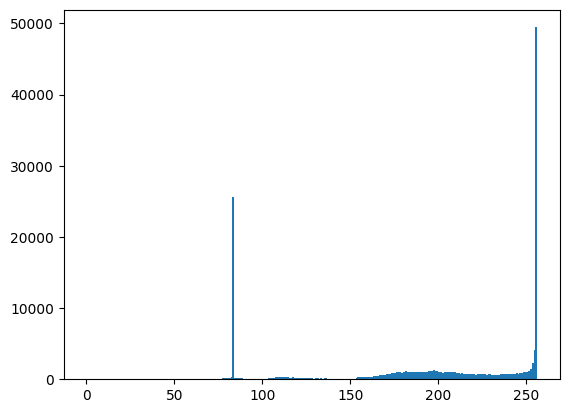

In [12]:
# Plot histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

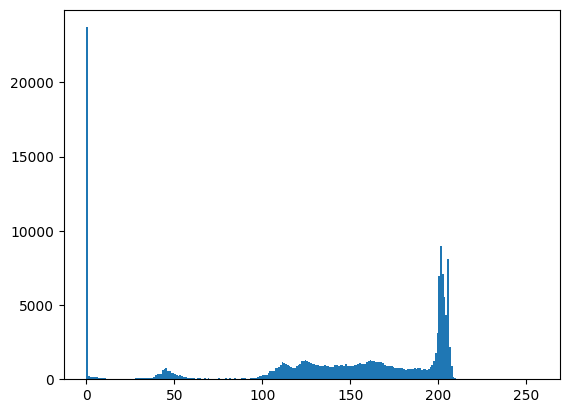

In [16]:

img = cv2.imread("C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\train\\images\\95-8-6-1_340_3_jpg.rf.a90272abd77e4d05c347e91ccabe7733.jpg", 0)
# Plot histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

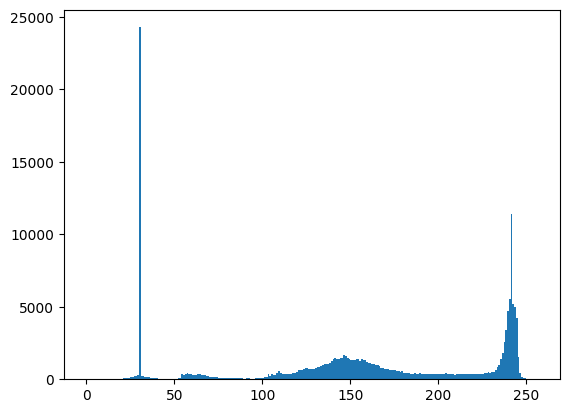

In [14]:
img = cv2.imread("C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\differential_wbc_data\\train\\images\\95-8-6-1_50_1_jpg.rf.f91347711c79e4c3f77071403a0b3876.jpg", 0)
# Plot histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

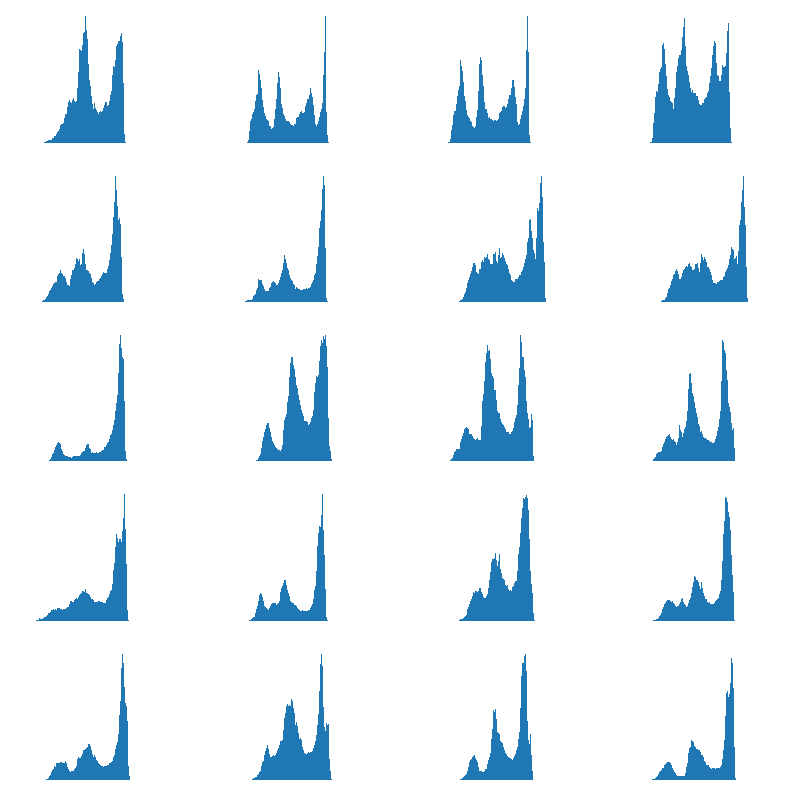

In [11]:
image_folder_path = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\TestA\\Basophil'
os.listdir(image_folder_path)
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path, 0))
# calculate the number of rows and columns based on the number of images
num_images = len(images[:20])
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(images[:20]):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    # plt.hist(image.ravel(), 256, [0, 256])
    axs[row, col].hist(image.ravel(), 256, [0, 256])
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

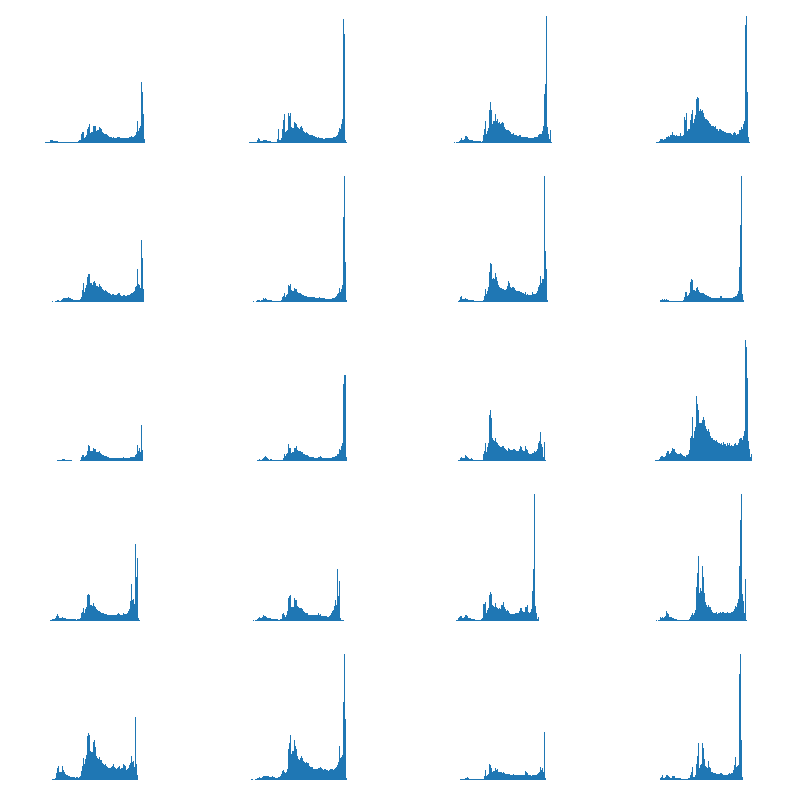

In [12]:
image_folder_path = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\TestA\\Eosinophil'
os.listdir(image_folder_path)
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path, 0))

# calculate the number of rows and columns based on the number of images
num_images = len(images[:20])
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(images[:20]):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    # plt.hist(image.ravel(), 256, [0, 256])
    axs[row, col].hist(image.ravel(), 256, [0, 256])
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

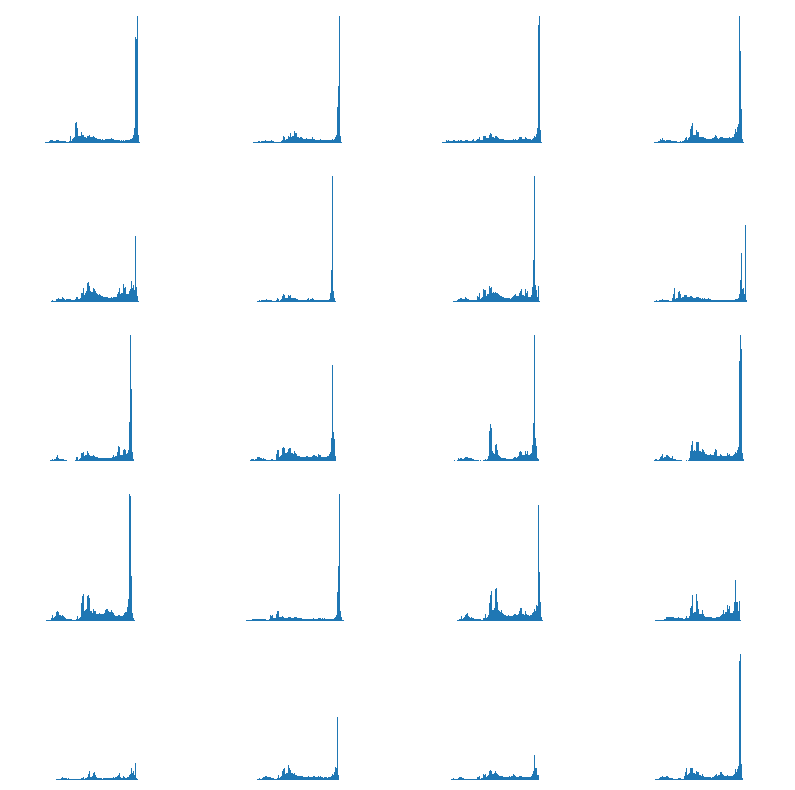

In [13]:
image_folder_path = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\TestA\\Monocyte'
os.listdir(image_folder_path)
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path, 0))

# calculate the number of rows and columns based on the number of images
num_images = len(images[:20])
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(images[:20]):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    # plt.hist(image.ravel(), 256, [0, 256])
    axs[row, col].hist(image.ravel(), 256, [0, 256])
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

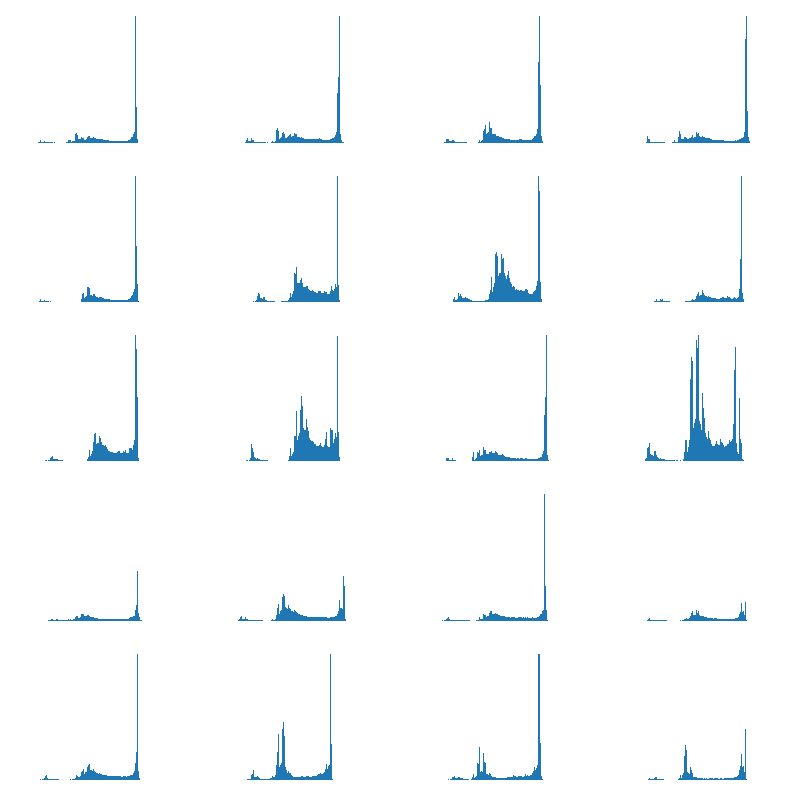

In [14]:
image_folder_path = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\TestA\\Lymphocyte'
os.listdir(image_folder_path)
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path, 0))

# calculate the number of rows and columns based on the number of images
num_images = len(images[:20])
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(images[:20]):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    # plt.hist(image.ravel(), 256, [0, 256])
    axs[row, col].hist(image.ravel(), 256, [0, 256])
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

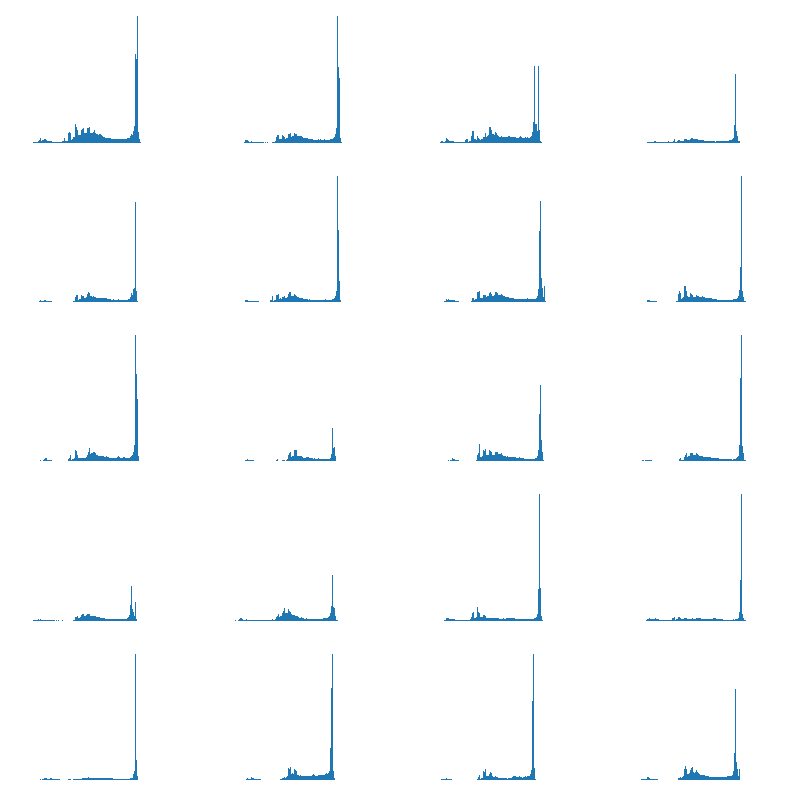

In [15]:
image_folder_path = 'C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\TestA\\Neutrophil'
os.listdir(image_folder_path)
images = []
file_path = []
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        image_file_path = os.path.join(image_folder_path, file_name)
        file_path.append(image_file_path)
        images.append(cv2.imread(image_file_path, 0))

# calculate the number of rows and columns based on the number of images
num_images = len(images[:20])
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# loop through the images and display them in the subplots
for i, image in enumerate(images[:20]):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    # plt.hist(image.ravel(), 256, [0, 256])
    axs[row, col].hist(image.ravel(), 256, [0, 256])
    axs[row, col].axis('off')

# hide any unused subplots
for i in range(num_images, num_rows*num_cols):
    if image is None or image.size == 0:
        continue
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# show the plot
plt.show()

Following features to work upon
link : https://onlinelibrary.wiley.com/doi/10.1111/ijlh.12832
Optimizing morphology through blood cell image analysis : https://docs.google.com/document/d/1vB4sXdMBdna61Q-W5rza-NCPeULZu2lk5O1HZ7HVW9U/edit?usp=sharing

1. area, perimeter of cytoplasm 
2. area, perimter of nucleus
3. number of nuclear lobes
4. cytoplasmic granules
5. cytoplasm upon nucleus area ratio
6. shape of the cell - counting the vertices 
7. nucleus eccentricity is calculated as the distance between the cell center and the nucleus center
8. RBC proximity
 Another example of a new geometric feature is the so-called RBC proximity, which is an indirect measure of the amount of cell cytoplasm that adheres to red blood cells (RBC). It is well known by pathologists that cytoplasm of reactive lymphocytes (RL) tends to adhere to neighboring (RBC). When a RL touches a RBC, there is a coincidence between the RL cytoplasm perimeter and the edge of the peripheral zone around the RL. Based on this observation, the RBC proximity is defined as the proportion of the RL perimeter (in pixels) that intersects the peripheral zone around the cell. The practical use of this feature is described for the first time in this study when it will be used for automatic recognition purposes 
 9. intensity


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def extract_cell_size(image):
    # Extract cell size
    # Implement your code to measure the size of the cell

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(121)
    plt.imshow(gray)

    # Perform image processing operations to segment the cell
    # Example: Thresholding to segment the cell
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.subplot(122)
    plt.imshow(binary)
    # Find contours of the cell
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate cell size (area) of the largest contour
    if len(contours) > 0:
        areas = [cv2.contourArea(contour) for contour in contours]
        cell_size = max(areas)
    else:
        cell_size = 0

    return cell_size


def extract_cell_shape(image):
    # Extract cell shape
    # Implement your code to analyze the shape of the cell

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(121)
    plt.imshow(gray)
    # Perform image processing operations to segment the cell
    # Example: Thresholding to segment the cell
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.subplot(122)
    plt.imshow(binary)
    # Find contours of the cell
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate cell shape characteristics
    if len(contours) > 0:
        contour = contours[0]
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(
            contour, 0.01 * cv2.arcLength(contour, True), True)

        # Calculate the number of vertices of the polygon
        num_vertices = len(approx)
    else:
        num_vertices = 0

    return num_vertices


# Define the RGB to CMYK conversion function
def bgr_to_cmyk(bgr):
    b, g, r = bgr/255.0
    b, g, r = b/255.0, g/255.0, r/255.0
    k = 1 - np.max([b, g, r])
    if k == 1:
        c = m = y = 0
    else:
        c = (1 - r - k) / (1 - k)
        m = (1 - g - k) / (1 - k)
        y = (1 - b - k) / (1 - k)
    return np.array([c, m, y, k])


def extract_nucleus_characteristic(image):
    # Apply the RGB to CMYK conversion to each pixel using a lambda function
    cmyk_img = np.apply_along_axis(lambda x: bgr_to_cmyk(x), axis=2, arr=image)

    # Scale the values in the CMYK image to the range 0-255
    cmyk_img = (cmyk_img*255).astype(np.uint8)

    c, m, y, k = cv2.split(cmyk_img)
    # Apply binary thresholding
    ret, thresh = cv2.threshold(c, 70, 255, cv2.THRESH_BINARY)
    # Use the thresholded image as a mask
    masked_img = cv2.bitwise_and(c, c, mask=thresh)
    masked_img = masked_img.copy()

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(
        masked_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Calculate the area and perimeter of the largest contour
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)

        return area, perimeter

    else:
        return 0, 0


def extract_nuclear_lobes(image):
    # Extract the number of nuclear lobes
    # Implement your code to segment the nuclei and count the lobes

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment nuclei
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours of nuclei
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    lobe_count = 0

    # Count the number of lobes in each nucleus
    for contour in contours:
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(
            contour, 0.01 * cv2.arcLength(contour, True), True)

        # Calculate the number of vertices of the polygon
        vertices = len(approx)

        # If the number of vertices is greater than a threshold, it is considered a nuclear lobe
        if vertices > 20:
            lobe_count += 1

    return lobe_count


def extract_cytoplasmic_granules(image):
    # Extract cytoplasmic granules
    # Implement your code to detect and analyze granules

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image processing techniques to enhance cytoplasmic granules
    # Example: Median filtering to reduce noise
    filtered = cv2.medianBlur(gray, 5)
    plt.subplot(121)
    plt.imshow(filtered)

    # Apply thresholding to segment cytoplasmic granules
    _, binary = cv2.threshold(
        filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    plt.subplot(122)
    plt.imshow(binary)
    # Find contours of granules
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    granule_count = len(contours)

    return granule_count


def extract_cell_size_shape(image):
    # Extract cell size and shape features
    # Implement your code to analyze cell size and shape

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform image processing operations to segment the cell
    # Example: Thresholding to segment the cell
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours of the cell
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate cell size and shape characteristics
    area = cv2.contourArea(contours[0])
    perimeter = cv2.arcLength(contours[0], True)

    return area, perimeter

In [43]:
img = cv2.imread(
    "C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\cropped_images8\\final_image6.jpg")

31732.5


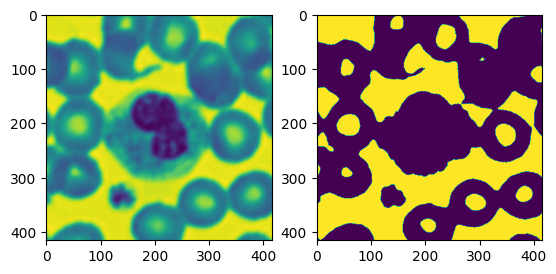

In [44]:
print(extract_cell_size(img))

(519.5, 88.66904652118683)


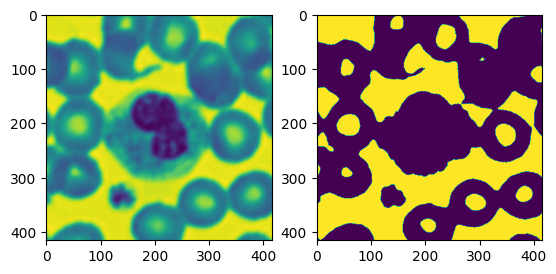

In [45]:
print(extract_nuclear_characteristics(img))

12


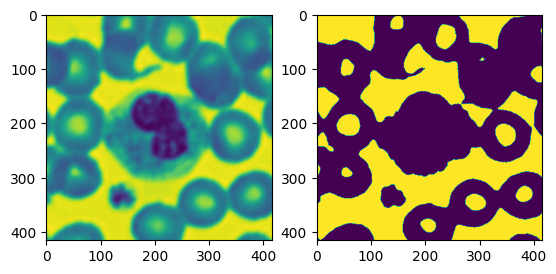

In [46]:
print(extract_cell_shape(img))

6


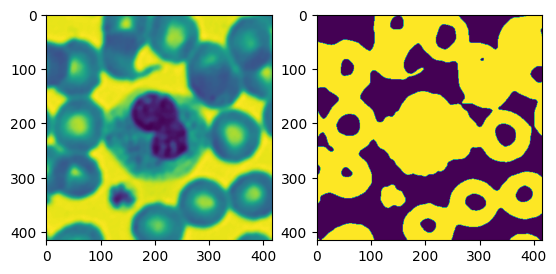

In [47]:
print(extract_cytoplasmic_granules(img))

In [48]:
print(extract_nuclear_lobes(img))

1


Functions 
1. cell area and perimeter
2. nucleus area and perimter
3. nucleus eccentricity is calculated as the distance between the cell center and the nucleus center
4. RBC proximity
5. cytoplasm to nucleus area ratio

In [37]:
# Cell area and perimeter
def extract_cell_size_shape(image):
    # Extract cell size and shape features
    # Implement your code to analyze cell size and shape
    image_copy = image.copy()
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform image processing operations to segment the cell
    # Example: Thresholding to segment the cell
    _, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # plt.imshow(binary)
    # Find contours of the cell
    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Filter contours based on minimum size
    filtered_contours = [
        contour for contour in contours if cv2.contourArea(contour) > 100]
    approx_center_contour = cv2.approxPolyDP(
        filtered_contours, 0.02 * cv2.arcLength(center_contour, True), True)
    # Get the center coordinates of the image
    height, width = gray.shape[:2]
    center_x = width // 2
    center_y = height // 2
    # Filter contours based on their centroid position
    selected_contours = []
    for contour in filtered_contours:
        # Calculate centroid coordinates
        M = cv2.moments(contour)
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])

        # Define a threshold to determine proximity to the center
        threshold = 250  # Adjust as needed

        # Check if the centroid is near the center
        if abs(centroid_x - center_x) <= threshold and abs(centroid_y - center_y) <= threshold:
            selected_contours.append(contour)
    cv2.drawContours(image_copy, selected_contours, -1, (0, 255, 0), 2)
    plt.imshow(image_copy)
    # Calculate cell size (area) of the largest selected contour
    if len(selected_contours) > 0:
        areas = [cv2.contourArea(contour) for contour in selected_contours]
        perimters = [cv2.arcLength(contour, True)
                     for contour in selected_contours]
        area = max(areas)
        perimeter = max(perimters)
    else:
        area = 0
        perimeter = 0

    return area, perimeter

In [38]:
print(extract_cell_size_shape(img))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'approxPolyDP'
> Overload resolution failed:
>  - approxPolyDP() missing required argument 'closed' (pos 3)
>  - approxPolyDP() missing required argument 'closed' (pos 3)


In [4]:
input_path = "C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\cropped_images8\\final_image8.jpg"

In [6]:
img = cv2.imread(input_path)

In [14]:
# Nucleus  area and perimter
# Define the RGB to CMYK conversion function
def bgr_to_cmyk(bgr):
    b, g, r = bgr/255.0
    b, g, r = b/255.0, g/255.0, r/255.0
    k = 1 - np.max([b, g, r])
    if k == 1:
        c = m = y = 0
    else:
        c = (1 - r - k) / (1 - k)
        m = (1 - g - k) / (1 - k)
        y = (1 - b - k) / (1 - k)
    return np.array([c, m, y, k])


def extract_nucleus_characteristic(image):
    # Apply the RGB to CMYK conversion to each pixel using a lambda function
    cmyk_img = np.apply_along_axis(lambda x: bgr_to_cmyk(x), axis=2, arr=image)

    # Scale the values in the CMYK image to the range 0-255
    cmyk_img = (cmyk_img*255).astype(np.uint8)

    c, m, y, k = cv2.split(cmyk_img)
    # Apply binary thresholding
    ret, thresh = cv2.threshold(c, 120, 255, cv2.THRESH_BINARY)
    # Use the thresholded image as a mask
    masked_img = cv2.bitwise_and(c, c, mask=thresh)
    masked_img = masked_img.copy()
    plt.imshow(masked_img)
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(
        masked_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Calculate the area and perimeter of the largest contour
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)

        return area, perimeter

    else:
        return 0, 0

(4133.0, 447.78888380527496)


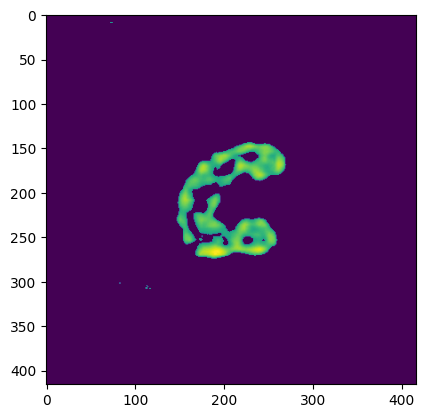

In [15]:
print(extract_nucleus_characteristic(img))

In [20]:
print(extract_cell_size_shape(img))

(145.0, 63.79898953437805)
